# Data Source

This dataset is grabbed from the Mexico City Open Data Portal: https://datos.cdmx.gob.mx/

Below is an article about the Open Data Portal: https://oecd-opsi.org/innovations/mexico-citys-open-data-portal-data-driven-responses/

Datasets from the Open Data Portal is here: https://datos.cdmx.gob.mx/group/administracion-y-finanzas


# Set Up

In [2]:
import pandas as pd
import seaborn as sbn

df = pd.read_csv('deuda_publica_2025_03.csv')

In [3]:
#Category Translation Dictionaries
#Translations made using Google Translate
cols = {'anio':'Year',
           'trimestre': 'Quarter',
           'mes': 'Month',
           'no_registro': 'Registration Number',
           'tipo_deuda': 'Debt Type',
           'detalle_tipo_deuda': 'Detailed Debt Type',
           'acreedor': 'Creditor',
           'concepto': 'Concept',
           'inicio_credito': 'Credit Start Date',
           'fin_credito': 'Credit End Date',
           'dias_contrato': 'Days of Credit',
           'dias_restantes_contrato': 'Days Remaining on Contract',
           'disposicion_inicial_credito': 'Initial Credit Disposition',
           'colocacion_periodo': 'Placement Period',
           'amortizaciones_periodo': 'Amortizations Period',
           'intereses_periodo': 'Interest Period',
           'pago_servicio_deuda': 'Payment Service Debt',
           'saldo_periodo':'Balance Period',
           'endeudamiento_periodo': 'Debt Period',
           'tasa': 'Rate',
           'sobretasa': 'Surcharge',
           'tasa_final': 'Final Rate'}

quarter = {'Primer Trimestre': 'First Quarter',
           'Segundo Trimestre': 'Second Quarter',
           'Tercer Trimestre': 'Third Quarter',
           'Cuarto Trimestre': 'Fourth Quarter'}

month = {'Diciembre':'December', 
         'Marzo':'March', 
         'Junio':'June', 
         'Septiembre':'September'}

debt_type = {'Largo Plazo': 'Long Term'}

detailed_debt_type = {'Mercado de Capitales':'Capital Market', 
                      'Banca Comercial':'Commercial Banking', 
                      'Banca de Desarrollo':'Development Bank',
                      'Bonos Cupón Cero':'Zero Coupon Bonds', 
                      'Bonos CupÃ³n Cero': 'Zero Coupon Bonds'}

# Definitions:

There are several definitions I need to understand/clarify in order to understand the data

- Amortizations: https://www.investopedia.com/terms/a/amortization.asp
- Disposition: https://www.investopedia.com/terms/d/disposition.asp
- Coupon Bonds: https://www.investopedia.com/terms/c/couponbond.asp
- Surcharge: https://www.investopedia.com/terms/s/surcharge.asp

# Transformation

In [4]:
df.rename(columns=cols, inplace=True)
df['Quarter'].replace(quarter, inplace=True)
df['Month'].replace(month, inplace=True)
df['Debt Type'].replace(debt_type, inplace=True)
df['Detailed Debt Type'].replace(detailed_debt_type, inplace=True)

/tmp/ipykernel_7656/419004885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quarter'].replace(quarter, inplace=True)
/tmp/ipykernel_7656/419004885.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [5]:
df

,Year,Quarter,Month,Registration Number,Debt Type,Detailed Debt Type,Creditor,Concept,Credit Start Date,Credit End Date,...,Initial Credit Disposition,Placement Period,Amortizations Period,Interest Period,Payment Service Debt,Balance Period,Debt Period,Rate,Surcharge,Final Rate
0,2018,Fourth Quarter,December,145/2010,Long Term,Capital Market,CI BANCO,BONO GDFCB 10-2,2010-06-25,2020-06-12,...,2.520951e+09,0.0,0.000000e+00,2.013680e+08,2.013680e+08,2.520951e+09,0.000000e+00,7.9,NaN,7.9
1,2018,Fourth Quarter,December,224/2007,Long Term,Commercial Banking,BANCOMER,"BANCOMER 3,457",2007-08-30,1937-07-27,...,3.457974e+09,0.0,1.480940e+07,2.860966e+08,3.009060e+08,3.389146e+09,-1.480940e+07,TIIE,0.35,TIIE+0.35
2,2018,Fourth Quarter,December,225/2007,Long Term,Commercial Banking,BANCOMER,BANCOMER 7000,2007-08-31,1940-08-27,...,7.000000e+09,0.0,1.089195e+08,5.809492e+08,6.898686e+08,6.371209e+09,-1.089195e+08,8.91,NaN,8.91
3,2018,Fourth Quarter,December,226/2007,Long Term,Commercial Banking,BANCOMER,"BANCOMER 4,700",2007-08-31,1937-07-27,...,4.700000e+09,0.0,2.012859e+07,4.018697e+08,4.219983e+08,4.606450e+09,-2.012859e+07,8.8,NaN,8.8
4,2018,Fourth Quarter,December,513/2008,Long Term,Development Bank,BANOBRAS,"BANOBRAS 1,914",2008-12-26,2019-10-25,...,1.914681e+09,0.0,3.203735e+08,2.445093e+07,3.448244e+08,1.277433e+08,-3.203735e+08,TIIE,0.97,TIIE+0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2025,First Quarter,March,P09-1219057,Long Term,Capital Market,CI BANCO,BONO CDMXCB 19,2019-12-03,2029-11-20,...,1.500000e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+09,0.000000e+00,7.82,NaN,7.82
1137,2025,First Quarter,March,P09-1112186,Long Term,Capital Market,CI BANCO,BONO GDFECB 12,2012-11-30,2027-11-12,...,2.500000e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+09,0.000000e+00,6.85,NaN,6.85
1138,2025,First Quarter,March,P09-0915121,Long Term,Capital Market,CI BANCO,BONO GDFECB 15-2,2015-09-25,2025-09-12,...,2.500000e+09,0.0,0.000000e+00,8.468056e+07,8.468056e+07,2.500000e+09,0.000000e+00,6.7,NaN,6.7
1139,2025,First Quarter,March,P09-0917056,Long Term,Capital Market,CI BANCO,BONO GCDMXCB 17X,2017-09-19,2028-03-07,...,2.000000e+09,0.0,0.000000e+00,7.684444e+07,7.684444e+07,2.000000e+09,0.000000e+00,7.6,NaN,7.6


# Questions & Analysis

1. Which Creditor is given the longest days of Credit?
2. Which year saw the most credit? The longest contracts? The least credit? The shortest contracts?
3. Which year saw the most interest paid over the interest period? (Interest Period)
4. How much value was lost during the Credit period? Which year saw the largest drop? (Amoritazation)

<Axes: xlabel='Creditor', ylabel='Days of Credit'>

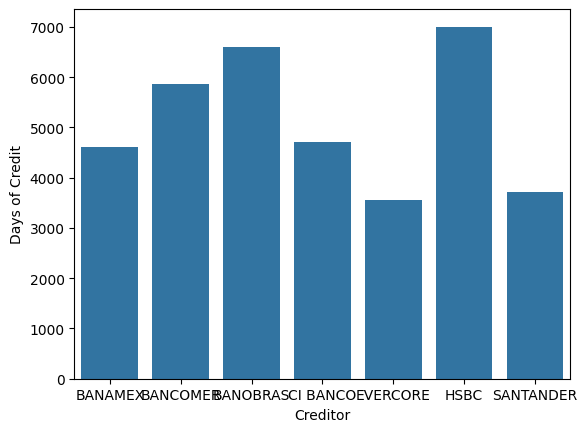

In [10]:
creditor_days = df.groupby('Creditor')['Days of Credit'].mean()
sbn.barplot(creditor_days)

In [19]:
creditor_over_time = df.groupby(['Year', 'Creditor'], group_keys=False)[['Days of Credit', 'Initial Credit Disposition', 'Interest Period']].mean()

## Amortization

Amortizations show the monthly payments used to pay off a loan.

<Axes: xlabel='Year', ylabel='Amortizations Period'>

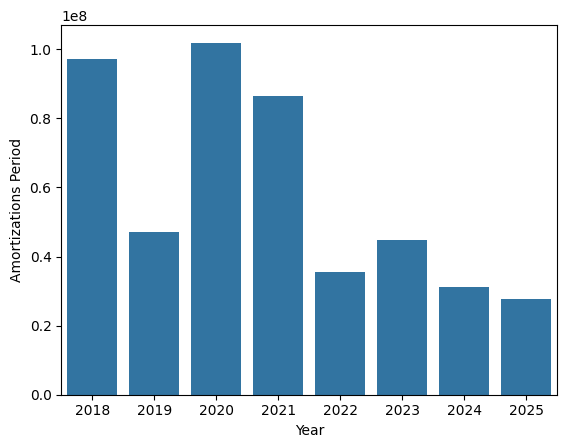

In [ ]:
avg_amortization = df.groupby('Year')['Amortizations Period'].mean()

sbn.barplot(avg_amortization)